# Swiss Roll reduction with LLE

In [1]:
import time as time
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.datasets import make_swiss_roll

In [2]:
# #############################################################################
# Generate data (swiss roll dataset)
n_samples = 1500
noise = 0#0.05
X, color = make_swiss_roll(n_samples, noise=noise)
print(X.shape)
# Make it thinner
#X[:, 1] *= 0.5

(1500, 3)


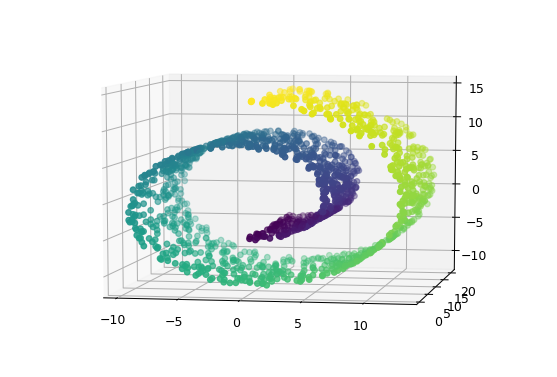

In [3]:
fig = plt.figure(dpi=90)
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(X[:,0], X[:,1], X[:,2], c=color)

This is so-called "swiss roll". The data points are in 3d, but they all lie on 2d manifold, so the dimensionality of the manifold is 2, while the dimensionality of the input space is 3.

There are many techniques to "unwrap" these manifolds. One of them is called Locally Linear Embedding, and this is how it would do that:

In [4]:
k= 12

In [5]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_neighbors=k, n_components=2)
#X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2)

X_lle = lle.fit_transform(X)

Text(0.5, 1.0, 'Projected data')

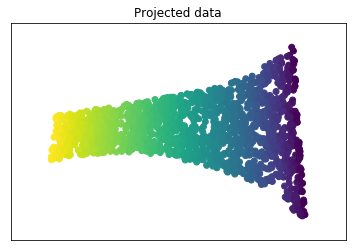

In [6]:
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color)
plt.xticks([]), plt.yticks([])
plt.title("Projected data")

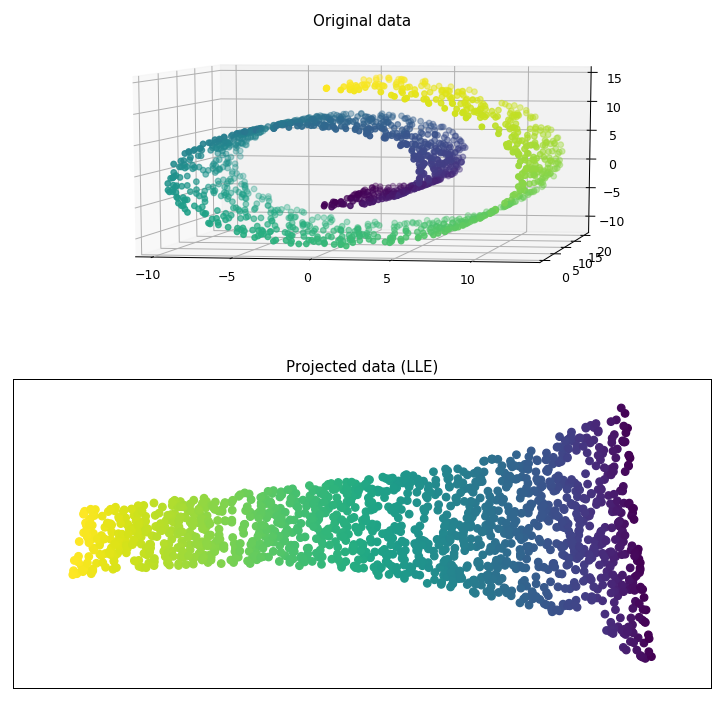

In [7]:
fig = plt.figure(figsize=(10,10), dpi=90)
ax = fig.add_subplot(211, projection="3d")
#ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(X[:,0], X[:,1], X[:,2], c=color)
ax.set_title("Original data")

plt.subplot(212)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color)
plt.xticks([]), plt.yticks([])
plt.title("Projected data (LLE)")

fig.savefig("image/swiss_roll_LLE.png")

In [8]:
from sklearn.manifold import TSNE

proj = TSNE(n_components=2).fit_transform(X)

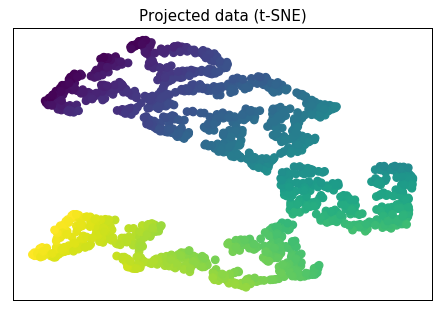

In [9]:
plt.figure(dpi=90)
plt.scatter(proj[:, 0], proj[:, 1], c=color)
plt.xticks([]), plt.yticks([])
plt.title("Projected data (t-SNE)")
fig.savefig("image/swiss_roll_tSNE.png")

### References

* Swiss Roll reduction with LLE
    * https://scikit-learn.org/stable/auto_examples/manifold/plot_swissroll.html

* Dimensionality and Manifold
    * https://datascience.stackexchange.com/a/5698